# The HR diagram

This assignment is about stars...

We will work with a star catalogue of 240 stars described by the following information:

- Temperature (in Kelvin)
- Luminosity (L/Lo)
- Radius (R/Ro)
- Absolute magnitude (Mv)

We also have the following data for each star:

- Color (Red/Orange/Yellow/White/Blue)
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)


In [1]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x7d914c1656d0>)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns


df_stars = pd.read_csv("stars.csv")

In [3]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [4]:
df_stars.iloc[:, :4]

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


There are 6 star types that are encoded in the *'Star type'* column. These labels are currently encoded as strings which is practical for reading but not for computing. Using scikit-learn, we will convert this column into integers by assigning a unique int value to each star type.



We've seen this already last time. It is often grood practice to start with a statistical analysis of the dataset to answer the following questions:
* are there any missing values?
* are there NaNs in the data?

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


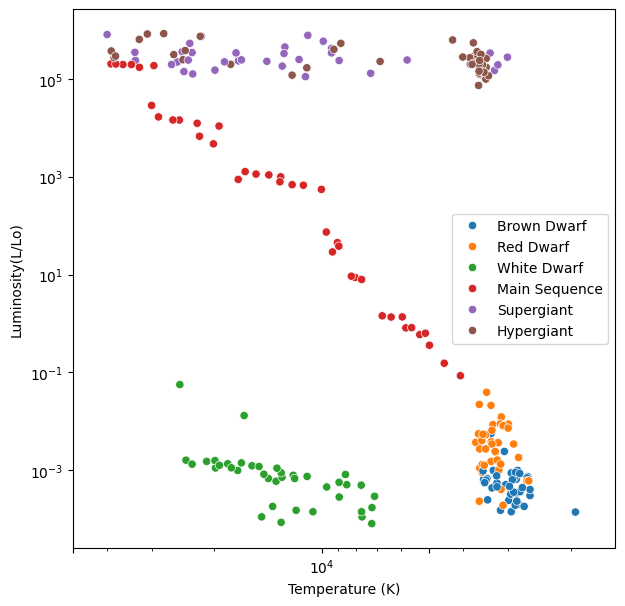

In [6]:
import seaborn as sns


fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

We find the same organization of stars in this 2D plane. Main Sequence stars and White Dwarves are fairly easy to isolate from the rest: a statistical model should be able to easily classify them. Based only on Luminosity and Temperature, Dwarf stars and Giant stars have higher intra-group variability: Supergiant and Hypergiant cover the same space (same for Brown and Red Dwarves). Additionnal variables might be needed to correctly identify the types of those stars.

## TASKS:
- Apply PCA to the dataset at your disposal (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two. 
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

**This is actually a very important lesson in machine learning**: Massaging your data before giving them to an algorithm can make things much much better.

- You can try an linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is [the usual machine-learning approach](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) standardize your data such that each dimension has mean=0 and variance=1. 
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?



### For later: come back to this assignment after lecture 20
- Now run a supervised classification algorithm on this dataset. 
- Can you predict the stellar type? How well? Careful with overfitting of course.

In [7]:
X = df_stars.iloc[:, :4]

print("initial shape of the datatset: ",X.shape)

pca= PCA() # n_components can be optionally set
pca.fit(X) 

eigenvalues = pca.transform(X) # compute the subspace projection of X, 4 eigenvalues for each of the 100 samples
mean = pca.mean_ # length 10 mean of the data
eigenvectors = pca.components_ # 4x10 matrix of components, multiply each by respective eigenvalue to reconstruct
evals = pca.explained_variance_ratio_ 

# Reconstruction of object1
# Xreconstruct[0] = mean + eigenvectors*eigenvalues[0]

print("new shape:", eigenvalues.shape)
print(eigenvectors.shape)

print('Explained fractional variance of data encapsulated in the eigenvalues: ' + str(evals), "\nsum: ", np.sum(evals))

initial shape of the datatset:  (240, 4)
new shape: (240, 4)
(4, 4)
Explained fractional variance of data encapsulated in the eigenvalues: [9.97606313e-01 2.38789920e-03 5.78677260e-06 1.34274189e-09] 
sum:  1.0


Text(0, 0.5, 'Second Principal Component')

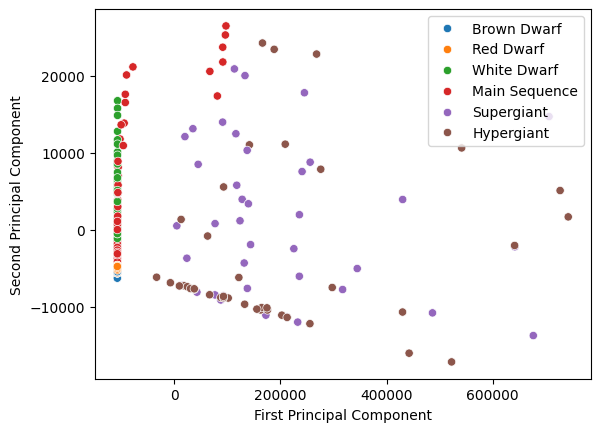

In [8]:
sns.scatterplot( x= eigenvalues[:,0], y= eigenvalues[:,1], hue=labels)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.xscale('log')
#plt.yscale('log')


## scree plots

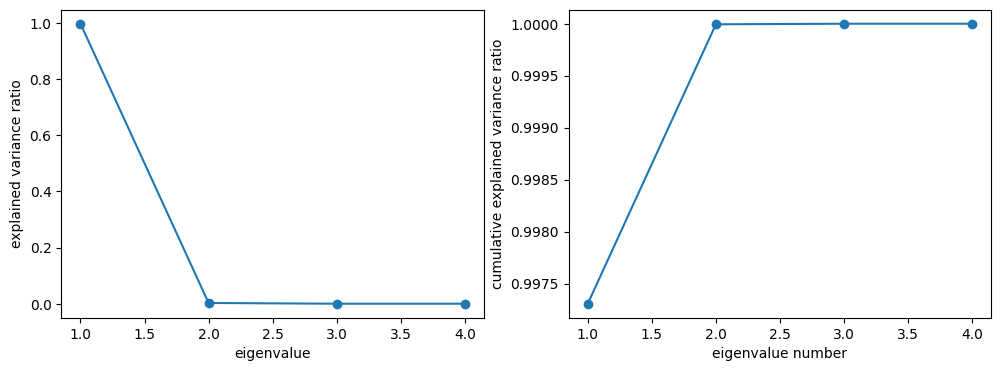

In [20]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(121)


n_components= np.ones(len(pca.explained_variance_ratio_ )) + range(len(pca.explained_variance_ratio_ ))

ax.plot(n_components, evals)
ax.scatter(n_components, evals)

ax.set_xlabel("eigenvalue")
ax.set_ylabel("explained variance ratio")

ax = fig.add_subplot(122)

ax.plot(n_components, evals.cumsum())
ax.scatter(n_components, evals.cumsum())

ax.set_xlabel("eigenvalue number")
ax.set_ylabel("cumulative explained variance ratio")

plt.show()

In [12]:
print("The first component explains {:.3f} of the variance in the data.".format(pca.explained_variance_ratio_[0]))
print("The second component explains {:.3f} of the variance in the data.".format(pca.explained_variance_ratio_[1]))
#print("All components explain {:.3f} of the variance in the data.".format(sum(pca.explained_variance_ratio_)))



The first component explains 0.998 of the variance in the data.
The second component explains 0.002 of the variance in the data.


### I'll use Standard Scaler to rescale the data before doing PCA: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")

X_train,  X_test, labels_train,labels_test= train_test_split(
    X, labels, test_size=0.30, random_state=42)

scaled_X_train = scaler.fit_transform(X_train)

In [14]:
colors = sns.color_palette("Set2", n_colors=2)

pca = PCA()
pca.fit(X_train)
eigenvalues = pca.transform(X_train)
mean = pca.mean_ 
eigenvectors = pca.components_ 
evals = pca.explained_variance_ratio_ 


# Reconstruction of object1
# Xreconstruct[0] = mean + eigenvectors*eigenvalues[0]

print("new shape:", eigenvalues.shape)
print(eigenvectors.shape)

print('Explained fractional variance of data encapsulated in the eigenvalues: ' + str(evals), "\nsum: ", np.sum(evals))


scaled_pca = PCA()
scaled_pca.fit(scaled_X_train)
scaled_eigenvalues = scaled_pca.transform(scaled_X_train)
scaled_mean = scaled_pca.mean_ # length 10 mean of the data
scaled_eigenvectors = scaled_pca.components_ # 4x10 matrix of components, multiply each by respective eigenvalue to reconstruct
scaled_evals = scaled_pca.explained_variance_ratio_ 

# Reconstruction of object1
# Xreconstruct[0] = mean + eigenvectors*eigenvalues[0]

print("new shape:", scaled_eigenvalues.shape)
print(scaled_eigenvectors.shape)

print('Explained fractional variance of data encapsulated in the scaled eigenvalues: ' + str(scaled_evals), "\nsum: ", np.sum(scaled_evals))

new shape: (168, 4)
(4, 4)
Explained fractional variance of data encapsulated in the eigenvalues: [9.97307183e-01 2.68720989e-03 5.60585073e-06 1.48722113e-09] 
sum:  1.0000000000000002
new shape: (168, 4)
(4, 4)
Explained fractional variance of data encapsulated in the scaled eigenvalues: [0.61159096 0.22948685 0.09142138 0.0675008 ] 
sum:  1.0


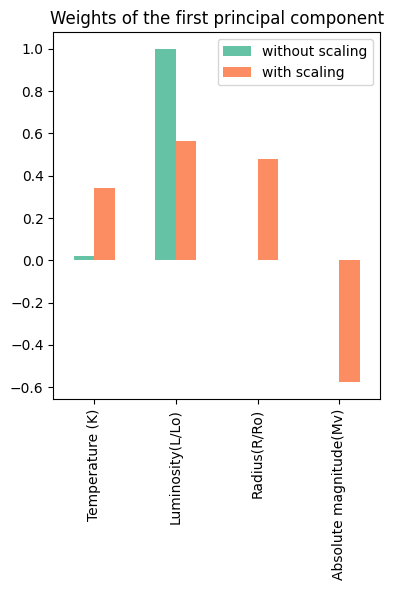

In [15]:
first_pca_component = pd.DataFrame(pca.components_[0], index=X.columns, columns=["without scaling"])

first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar( title="Weights of the first principal component", figsize=(4, 6), color= colors)

_ = plt.tight_layout()

Text(0, 0.5, 'Second Principal Component')

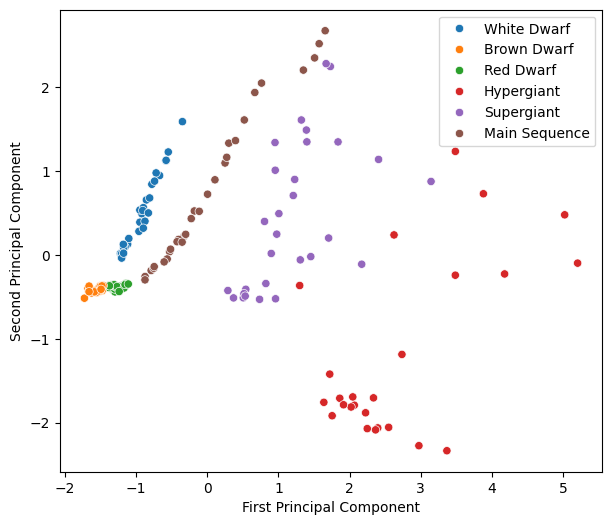

In [16]:
fig = plt.figure(figsize=(7, 6))
sns.scatterplot( x = scaled_eigenvalues[:,0], y= scaled_eigenvalues[:,1], hue=labels_train)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.xscale('log')
#plt.yscale('log')


## scree plot

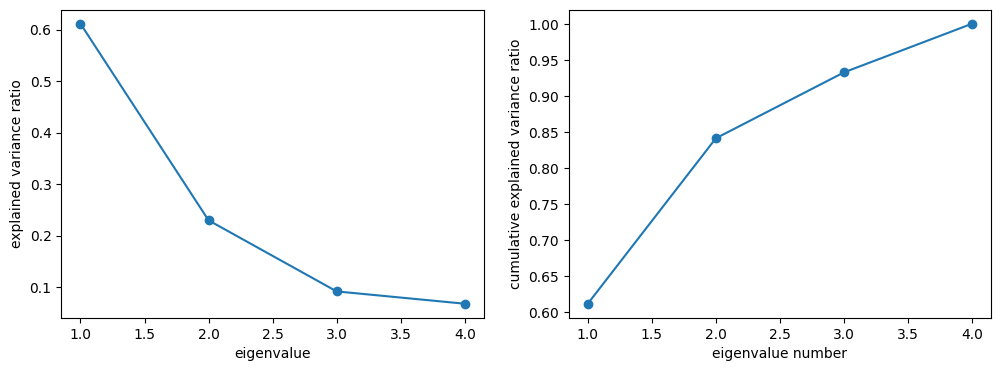

In [19]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(121)

n_components= np.ones(len(scaled_pca.explained_variance_ratio_ )) + range(len(scaled_pca.explained_variance_ratio_ ))


ax.plot(n_components, scaled_evals)
ax.scatter(n_components, scaled_evals)

ax.set_xlabel("eigenvalue")
ax.set_ylabel("explained variance ratio")

ax = fig.add_subplot(122)

ax.plot(n_components, scaled_evals.cumsum())
ax.scatter(n_components, scaled_evals.cumsum())

ax.set_xlabel("eigenvalue number")
ax.set_ylabel("cumulative explained variance ratio")

plt.show()

# I need to add: 
- check, I split into train and test for a reason....
- classification!!